<a href="https://colab.research.google.com/github/A-Peoples/DSRP_Project/blob/main/Data_Science_Project_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question: Which stats correlate with getting into the hall of fame? Can you accurately predict HOF status with a model?**

**Importing Packages**

In [181]:
import warnings
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [182]:
df = pd.read_csv('/content/500hits.csv',encoding = "latin-1")

#renaming columns for easier use

df = df.rename(columns={"YRS": "Years_Active",
                        "AB": "At_Bat",
                        "R": "Runs",
                        "H": "Hits",
                        "2B": "Doubles",
                        "3B": "Triples",
                        "HR": "Home_Runs",
                        "RBI": "Runs_Batted",
                        "BB": 'Base_on_Balls',
                        "SO": "Strikeouts",
                        "SB": 'Bases_Stolen',
                        "CS": "Caught_Stealing",
                        "BA": 'Batting_Avg'})

In [183]:
#seperating Hall Of Fame (HOF) from Non-HOF players.

hof_df = df.loc[df['HOF'] == 1]
no_hof_df = df.loc[df['HOF'] == 0]

In [184]:
#creating a batting average dataset

strike_df  = df.sort_values(by="Strikeouts", ascending=False)
strike_df['Batting_Avg'] = (strike_df['Hits'] / strike_df['At_Bat'])
plt.style.use('default')

In [185]:
#creating a clear rate for filtering columns under 3rd quartile

x = strike_df.describe()
x = x.head(7).tail(1)
x['PLAYER'] = "75%"
standard_df = pd.concat([strike_df, x])

standard_df.tail(1)

,PLAYER,Years_Active,G,At_Bat,Runs,Hits,Doubles,Triples,Home_Runs,Runs_Batted,Base_on_Balls,Strikeouts,Bases_Stolen,Caught_Stealing,Batting_Avg,HOF
75%,75%,19.0,2247.0,8180.0,1296.0,2375.0,436.0,107.0,292.0,1206.0,955.0,1226.0,285.0,84.0,0.300231,1.0


In [186]:
#filtering by top 75% for major columns
Doubles = standard_df.loc[standard_df['Doubles'] > x['Doubles'].iloc[0]].HOF.mean()
Triples = standard_df.loc[standard_df['Triples'] > x['Triples'].iloc[0]].HOF.mean()
Home_Runs = standard_df.loc[standard_df['Home_Runs'] > x['Home_Runs'].iloc[0]].HOF.mean()

Base_on_Balls = standard_df.loc[standard_df['Base_on_Balls'] > x['Base_on_Balls'].iloc[0]].HOF.mean()
Runs_Batted = standard_df.loc[standard_df['Runs_Batted'] > x['Runs_Batted'].iloc[0]].HOF.mean()
Bases_Stolen = standard_df.loc[standard_df['Bases_Stolen'] > x['Bases_Stolen'].iloc[0]].HOF.mean()
Caught_Stealing = standard_df.loc[standard_df['Caught_Stealing'] > x['Caught_Stealing'].iloc[0]].HOF.mean()
Strikeouts = standard_df.loc[standard_df['Strikeouts'] > x['Strikeouts'].iloc[0]].HOF.mean()

In [187]:
pie_df = df.groupby(['Years_Active']).agg({'HOF': ['count', 'sum', "mean"]}).reset_index()

pie_df.columns = list(map("_".join, pie_df.columns))

pie_df = pie_df.rename(columns={"Years_Active_": 'Years_Active',
                                'HOF_mean': 'HOF_Succ%',
                                'HOF_count': 'Players_Total',
                                'HOF_sum': 'HOF'})

pie_df["HOF_Succ%"] = pie_df['HOF_Succ%'].round(3)

pie_df

,Years_Active,Players_Total,HOF,HOF_Succ%
0,11,3,0,0.000
1,12,12,2,0.167
2,13,23,4,0.174
3,14,43,7,0.163
4,15,68,13,0.191
5,16,56,13,0.232
6,17,76,19,0.250
7,18,56,18,0.321
8,19,48,21,0.438
9,20,26,15,0.577


In [188]:
df['Batting_Avg'] = df['Batting_Avg'] * df['At_Bat']

df.sort_values(by='Batting_Avg', ascending=False)

,PLAYER,Years_Active,G,At_Bat,Runs,Hits,Doubles,Triples,Home_Runs,Runs_Batted,Base_on_Balls,Strikeouts,Bases_Stolen,Caught_Stealing,Batting_Avg,HOF
0,Ty Cobb,24,3035,11434,2246,4189,724,295,117,726,1249,357,892,178,4184.844,1
147,Hank Aaron,23,3298,12364,2174,3771,624,98,755,2297,1402,1383,240,73,3771.020,1
1,Stan Musial,22,3026,10972,1949,3630,725,177,475,1951,1599,696,78,31,3631.732,1
2,Tris Speaker,22,2789,10195,1882,3514,792,222,117,724,1381,220,432,129,3517.275,1
3,Derek Jeter,20,2747,11195,1923,3465,544,66,260,1311,1082,1840,358,97,3470.450,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,Brady Anderson,15,1834,6499,1062,1661,338,67,210,761,960,1190,315,100,1663.744,0
460,Jim Wynn,15,1920,6653,1105,1665,285,39,291,964,1224,1427,225,101,1663.250,0
461,Jorge Posada,17,1829,6092,900,1664,379,10,275,1065,936,1453,20,21,1663.116,0
464,Mickey Rivers,15,1468,5629,785,1660,247,71,61,499,266,471,267,90,1660.555,0


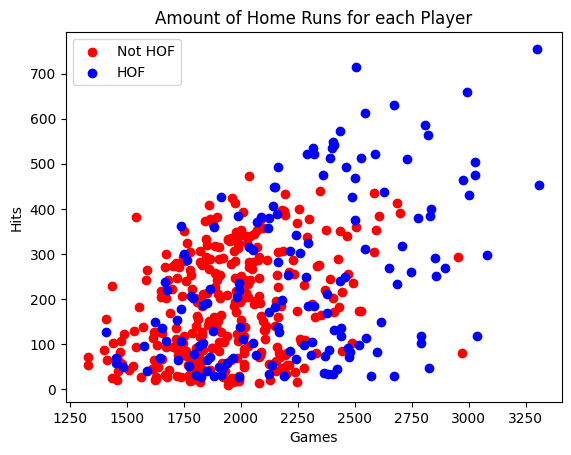

In [189]:
plt.scatter(no_hof_df['G'], no_hof_df['Home_Runs'], color='red')
plt.xlabel('Games')
plt.ylabel('Hits')
plt.title('Amount of Hits for Games')
plt.scatter(hof_df['G'], hof_df['Home_Runs'], color='blue')
plt.xlabel('Games')
plt.ylabel('Hits')
plt.title('Amount of Home Runs for each Player')

plt.legend(["Not HOF", "HOF"])


**HYPOTHESIS:** **The amount of games/years played affects HOF Succ% rate.**

Text(0.5, 1.0, 'Hall of Fame Percentage for Major Stats')

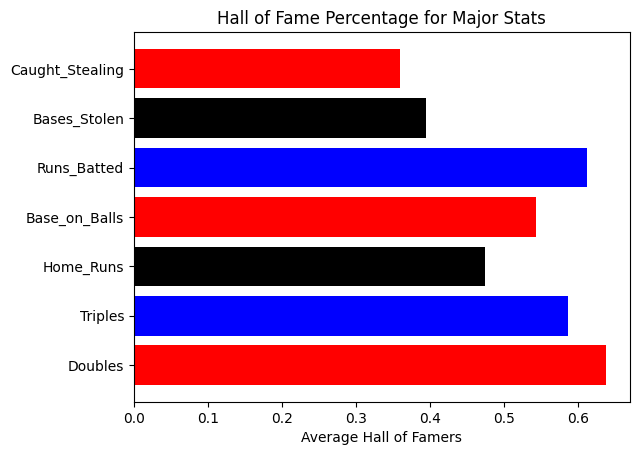

In [190]:
#filtering the columns to be above the third quartile and charting the average percent of HOF success

cols = ['Doubles', 'Triples', 'Home_Runs', 'Base_on_Balls', 'Runs_Batted', 'Bases_Stolen', 'Caught_Stealing']
num_list = []
for col in cols:
  y = standard_df.loc[standard_df[col] > x[col].iloc[0]].HOF.mean()
  num_list.append(y)

nums = {cols[0]: num_list[0],
 cols[1]: num_list[1],
 cols[2]: num_list[2],
 cols[3]: num_list[3],
 cols[4]: num_list[4],
 cols[5]: num_list[5],
 cols[6]: num_list[6],}

plt.barh(cols, num_list, color=['red', 'blue', 'black'])
plt.xlabel("Average Hall of Famers")
plt.title("Hall of Fame Percentage for Major Stats")

Text(0.5, 1.0, 'Hall of Fame Percentage for Major Stats Divided by Games')

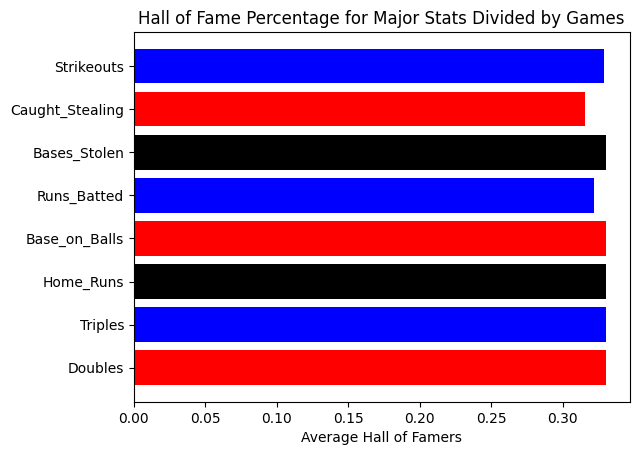

In [191]:
avg_df = df
cols = ['Doubles', 'Triples', 'Home_Runs', 'Base_on_Balls', 'Runs_Batted', 'Bases_Stolen', 'Caught_Stealing', 'Strikeouts']

avg_df = avg_df.rename(columns={"YRS": "Years_Active",
                        "AB": "At_Bat",
                        "R": "Runs",
                        "H": "Hits",
                        "2B": "Doubles",
                        "3B": "Triples",
                        "HR": "Home_Runs",
                        "RBI": "Runs_Batted",
                        "BB": 'Base_on_Balls',
                        "SB": 'Bases_Stolen',
                        "CS": "Caught_Stealing",
                        "BA": 'Batting_Avg'})
for col in cols:
  avg_df[col] = avg_df[col] / avg_df['At_Bat']

#getting the 3rd quartile from the
x = avg_df.describe()
x = x.head(2).tail(1)
x['PLAYER'] = "75%"

num_list = []
for col in cols:
  y = standard_df.loc[standard_df[col] > x[col].iloc[0]].HOF.mean()
  num_list.append(y)

nums = {cols[0]: num_list[0],
 cols[1]: num_list[1],
 cols[2]: num_list[2],
 cols[3]: num_list[3],
 cols[4]: num_list[4],
 cols[5]: num_list[5],
 cols[6]: num_list[6],}

#displaing the model
plt.barh(cols, num_list, color=['red', 'blue', 'black'])
plt.xlabel("Average Hall of Famers")
plt.title("Hall of Fame Percentage for Major Stats Divided by Games")

Text(0.5, 1.0, 'Amount of Hall of Famers for Years Played')

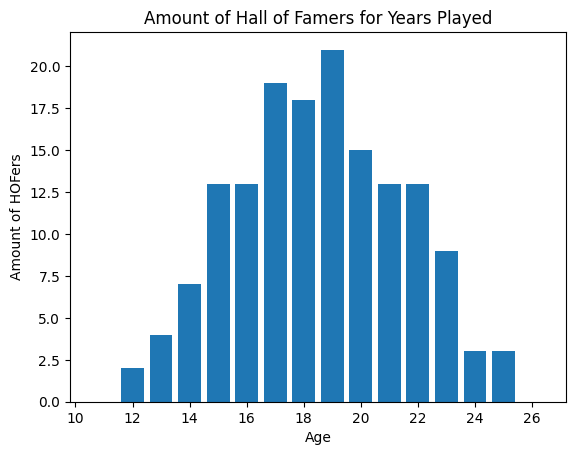

In [205]:
# Making a bar plot to show the amount of HOF for the mount of years played
pie_df = df.groupby(['Years_Active']).agg({'HOF': "sum"}).reset_index()
plt.bar(pie_df['Years_Active'], pie_df['HOF'])
plt.xlabel("Age")
plt.ylabel('Hall of Famers')
plt.ylabel('Amount of HOFers')
plt.title("Amount of Hall of Famers for Years Played")

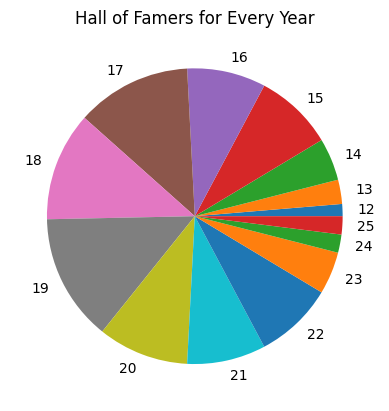

In [194]:
# Making a pie chart to show the amount of HOF for the mount of years played

pie_df = hof_df.groupby(['Years_Active']).agg({'HOF': "sum"}).reset_index()
plt.pie(pie_df['HOF'], labels=pie_df['Years_Active'])
plt.title('Hall of Famers for Every Year')
plt.show()

**Part 2: Creating a Linear Regression Model**

In [195]:
#Creating a Linear Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [196]:
#Choosing Final Columns
X = df[['G', 'Home_Runs', 'Triples', 'Doubles']]

y = df['HOF']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)

cross_val_scores = cross_val_score(model, X_test, y_test, cv=7)
cross_val_scores_mean = cross_val_scores.mean()

cross_val_scores_mean


np.float64(0.859497645211931)

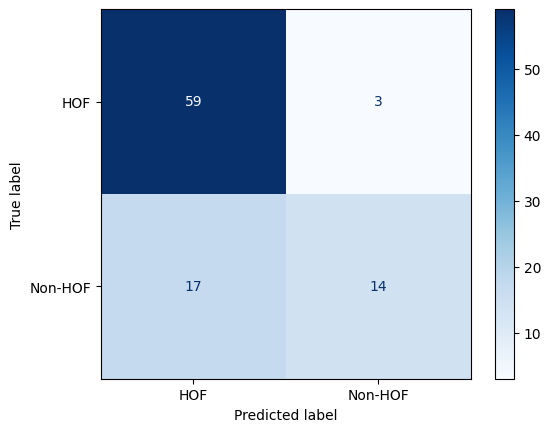

In [197]:
#creating a confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

dis = ConfusionMatrixDisplay(cm, display_labels=['HOF', 'Non-HOF'])
dis.plot(cmap=plt.cm.Blues)
plt.show()